# Exploring the relationship between household size and car availability <a class="tocSkip">


This project contains 4 data:

household_car.csv: This dataset provides Census 2021 estimates that classify all households in England and Wales by household size.

household_size.csv: This dataset provides Census 2021 estimates on the number of cars or vans available to members of households for England and Wales.

OAC21.csv: This data provides output area classification for 2021

Oac_england.geojson: This file contains the digital vector boundaries for Output Areas in England and Wales, as at 21 March 2021.

All of them are openly available data.

## Basic packages and data upload

In [2]:
# import required packages
import geopandas as gpd
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

import matplotlib.pyplot as plt

# import the required machine learning packages
from sklearn import cluster
from sklearn.preprocessing import scale


In [3]:
# set seaborn plotting theme to white
sns.set_theme(style="white")

In [4]:
# colab users only - uncomment to run
!pip install mapclassify

In [5]:
# upload data
housesize = pd.read_csv('household_size.csv')
car = pd.read_csv('household_car.csv')
oac = pd.read_csv('OAC21.csv')
england = gpd.read_file('oac_england.geojson')

## Data checking
Exploring the first 5 rows of the datafram, and using info() to check if there has null values in data.

After checking the housesize file at the first 5 rows, all the values in 0_people_in_household/'6_people_in_household'/'7_people_in_household'/'8_or_more_people_in_household' probable are 0. So the sum() is used to check if the sum of these column is 0. The sum is 0 identifies all the values in  0_people_in_household is 0 which is an invalid data. Data contains a number of duplicate values is considered as redundancy which might detrementally affect the performance (Dasari & Varma, 2002). So it is deleted from data.

The rest data in fine with non-null values and type is right.

In [6]:
# look at the first 5 rows of the dataframe
housesize.head()

2021oac   mnemonic  All_households  0_people_in_household  \
0  E00000001  E00000001              94                      0   
1  E00000003  E00000003             109                      0   
2  E00000005  E00000005              63                      0   
3  E00000007  E00000007              87                      0   
4  E00000010  E00000010             125                      0   

   1_person_in_household  2_people_in_household  3_people_in_household  \
0                     34                     44                     10   
1                     27                     42                     19   
2                     26                     27                      8   
3                     38                     44                      2   
4                     96                     19                      4   

   4_people_in_household  5_people_in_household  6_people_in_household  \
0                      6                      0                      0   
1                     17                      4                      0   
2                      2                      0                      0   
3                      2                      1                      0   
4                      3                      3                      0   

   7_people_in_household  8_or_more_people_in_household  
0                      0                              0  
1                      0                              0  
2                      0                              0  
3                      0                              0  
4                      0                              0

In [7]:
car.head()

2021oac   mnemonic  All_households  No_cars_or_vans_in_household  \
0  E00000001  E00000001              95                            46   
1  E00000003  E00000003             109                            51   
2  E00000005  E00000005              61                            37   
3  E00000007  E00000007              86                            66   
4  E00000010  E00000010             126                           109   

   1_car_or_van_in_household  2_cars_or_vans_in_household  \
0                         41                            5   
1                         47                            7   
2                         18                            2   
3                         16                            4   
4                         17                            0   

   3_or_more_cars_or_vans_in_household  
0                                    3  
1                                    4  
2                                    4  
3                                    0  
4                                    0

In [8]:
oac.head()

OA21CD     la23cd  sg
0  E00000001  E09000001   3
1  E00000003  E09000001   3
2  E00000005  E09000001   3
3  E00000007  E09000001   3
4  E00000010  E09000001   3

In [9]:
england.head()

FID     OA21CD   LSOA21CD             LSOA21NM LSOA21NMW   BNG_E   BNG_N  \
0    1  E00000001  E01000001  City of London 001A            532250  181864   
1    2  E00000003  E01000001  City of London 001A            532171  181819   
2    3  E00000005  E01000001  City of London 001A            532166  181722   
3    4  E00000007  E01000001  City of London 001A            532088  181473   
4    5  E00000010  E01000003  City of London 001C            532092  182114   

        LAT     LONG                              GlobalID  \
0  51.52022 -0.09523  3a44dd3d-5082-4a09-9b9c-3a5fadc811ed   
1  51.51983 -0.09638  f1216dc8-14d1-4857-9230-cab0641758fb   
2  51.51896 -0.09649  44d6f70f-549c-4288-9b6d-de2adbf02582   
3  51.51674 -0.09771  4dd683e1-9a5c-46cf-9e19-8465c8fbb6cb   
4  51.52250 -0.09741  7476781f-8fe4-4c9b-bde1-0eecbd146dff   

                                            geometry  
0  POLYGON ((532303.492 181814.110, 532213.378 18...  
1  POLYGON ((532213.378 181846.192, 532190.539 18...  
2  POLYGON ((532180.131 181763.020, 532219.161 18...  
3  POLYGON ((532201.292 181668.180, 532267.728 18...  
4  POLYGON ((532127.958 182133.192, 532089.264 18...

In [10]:
# data overview
housesize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188880 entries, 0 to 188879
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   2021oac                        188880 non-null  object
 1   mnemonic                       188880 non-null  object
 2   All_households                 188880 non-null  int64 
 3   0_people_in_household          188880 non-null  int64 
 4   1_person_in_household          188880 non-null  int64 
 5   2_people_in_household          188880 non-null  int64 
 6   3_people_in_household          188880 non-null  int64 
 7   4_people_in_household          188880 non-null  int64 
 8   5_people_in_household          188880 non-null  int64 
 9   6_people_in_household          188880 non-null  int64 
 10  7_people_in_household          188880 non-null  int64 
 11  8_or_more_people_in_household  188880 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 17.3+ 

In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188880 entries, 0 to 188879
Data columns (total 7 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   2021oac                              188880 non-null  object
 1   mnemonic                             188880 non-null  object
 2   All_households                       188880 non-null  int64 
 3   No_cars_or_vans_in_household         188880 non-null  int64 
 4   1_car_or_van_in_household            188880 non-null  int64 
 5   2_cars_or_vans_in_household          188880 non-null  int64 
 6   3_or_more_cars_or_vans_in_household  188880 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 10.1+ MB


In [12]:
oac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188880 entries, 0 to 188879
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   OA21CD  188880 non-null  object
 1   la23cd  188880 non-null  object
 2   sg      188880 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.3+ MB


In [13]:
england.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 188880 entries, 0 to 188879
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   FID        188880 non-null  int64   
 1   OA21CD     188880 non-null  object  
 2   LSOA21CD   188880 non-null  object  
 3   LSOA21NM   188880 non-null  object  
 4   LSOA21NMW  188880 non-null  object  
 5   BNG_E      188880 non-null  int64   
 6   BNG_N      188880 non-null  int64   
 7   LAT        188880 non-null  float64 
 8   LONG       188880 non-null  float64 
 9   GlobalID   188880 non-null  object  
 10  geometry   188880 non-null  geometry
dtypes: float64(2), geometry(1), int64(3), object(5)
memory usage: 15.9+ MB


In [14]:
# check if all the values in 0_people_in_household/'6_people_in_household'/'7_people_in_household'/'8_or_more_people_in_household' are 0
check_0 = housesize['0_people_in_household'].sum()
check_6 = housesize['6_people_in_household'].sum()
check_7 = housesize['7_people_in_household'].sum()
check_8 = housesize['8_or_more_people_in_household'].sum()
check_0,check_6,check_7,check_8


(0, 374086, 130502, 95463)

<Axes: >

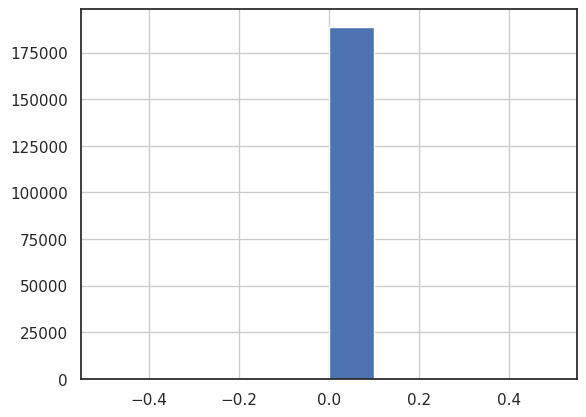

In [15]:
# check if all the values in 0_people_in_household/'6_people_in_household'/'7_people_in_household'/'8_or_more_people_in_household' are 0
housesize['0_people_in_household'].hist()

<Axes: >

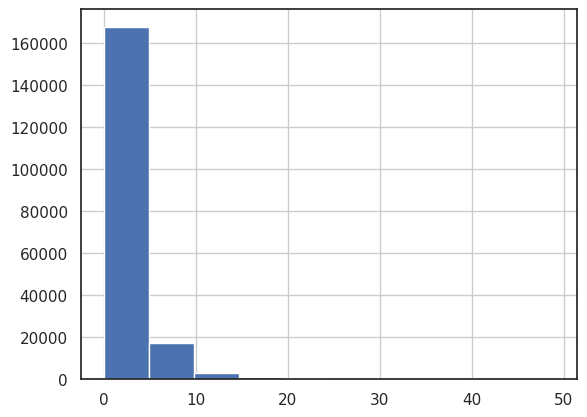

In [16]:
housesize['6_people_in_household'].hist()

<Axes: >

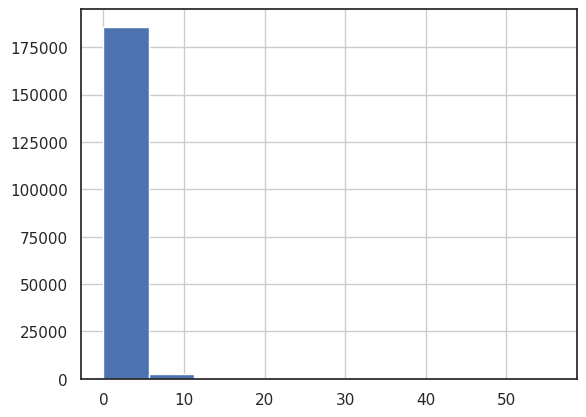

In [17]:
housesize['7_people_in_household'].hist()

<Axes: >

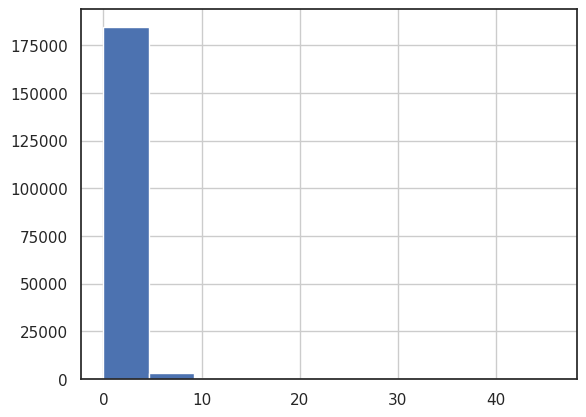

In [18]:
housesize['8_or_more_people_in_household'].hist()

In [19]:
# delete 0_people_in_household
housesize = housesize.drop(columns=['0_people_in_household'])
housesize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188880 entries, 0 to 188879
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   2021oac                        188880 non-null  object
 1   mnemonic                       188880 non-null  object
 2   All_households                 188880 non-null  int64 
 3   1_person_in_household          188880 non-null  int64 
 4   2_people_in_household          188880 non-null  int64 
 5   3_people_in_household          188880 non-null  int64 
 6   4_people_in_household          188880 non-null  int64 
 7   5_people_in_household          188880 non-null  int64 
 8   6_people_in_household          188880 non-null  int64 
 9   7_people_in_household          188880 non-null  int64 
 10  8_or_more_people_in_household  188880 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 15.9+ MB


## Joining Data
Join the housesize into the car with the common ID '2021soa' firstly, then join the housesize_car into oac with the common ID 'LSOA21CD/mnemonic_x'. One thing is needed to note that the columns as the key to connect two data should have same data format or the joining will fail. For example, in this project the 'OA21CD' in oac cannot be the commom ID to join data. After joining data, the info() is used to check if join successfully.

In [21]:
# join the householdsize data to the car using a outer join, on the common ID '2021soa'
housesize_car = pd.merge(housesize,car, how='outer', on='2021oac')

In [22]:
housesize_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188880 entries, 0 to 188879
Data columns (total 17 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   2021oac                              188880 non-null  object
 1   mnemonic_x                           188880 non-null  object
 2   All_households_x                     188880 non-null  int64 
 3   1_person_in_household                188880 non-null  int64 
 4   2_people_in_household                188880 non-null  int64 
 5   3_people_in_household                188880 non-null  int64 
 6   4_people_in_household                188880 non-null  int64 
 7   5_people_in_household                188880 non-null  int64 
 8   6_people_in_household                188880 non-null  int64 
 9   7_people_in_household                188880 non-null  int64 
 10  8_or_more_people_in_household        188880 non-null  int64 
 11  mnemonic_y                

In [23]:
# join the householdsize_car data to the England geodataframe using a left join, on the common ID 'LSOA21CD/mnemonic_x'
england_size_car = england.merge(housesize_car, how='left', left_on='OA21CD', right_on='mnemonic_x')
england_size_car.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 188880 entries, 0 to 188879
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   FID                                  188880 non-null  int64   
 1   OA21CD                               188880 non-null  object  
 2   LSOA21CD                             188880 non-null  object  
 3   LSOA21NM                             188880 non-null  object  
 4   LSOA21NMW                            188880 non-null  object  
 5   BNG_E                                188880 non-null  int64   
 6   BNG_N                                188880 non-null  int64   
 7   LAT                                  188880 non-null  float64 
 8   LONG                                 188880 non-null  float64 
 9   GlobalID                             188880 non-null  object  
 10  geometry                             188880 non-null  geomet

In [24]:
england_size_car

FID     OA21CD   LSOA21CD              LSOA21NM  \
0            1  E00000001  E01000001   City of London 001A   
1            2  E00000003  E01000001   City of London 001A   
2            3  E00000005  E01000001   City of London 001A   
3            4  E00000007  E01000001   City of London 001A   
4            5  E00000010  E01000003   City of London 001C   
...        ...        ...        ...                   ...   
188875  188876  W00010693  W01000062          Gwynedd 001A   
188876  188877  W00010694  W01000645  Carmarthenshire 006C   
188877  188878  W00010695  W01000664  Carmarthenshire 016C   
188878  188879  W00010696  W01001923  Carmarthenshire 026G   
188879  188880  W00010697  W01000667  Carmarthenshire 023C   

                   LSOA21NMW   BNG_E   BNG_N       LAT     LONG  \
0                             532250  181864  51.52022 -0.09523   
1                             532171  181819  51.51983 -0.09638   
2                             532166  181722  51.51896 -0.09649   
3                             532088  181473  51.51674 -0.09771   
4                             532092  182114  51.52250 -0.09741   
...                      ...     ...     ...       ...      ...   
188875          Gwynedd 001A  257885  371596  53.22236 -4.13012   
188876  Sir Gaerfyrddin 006C  240146  220834  51.86313 -4.32295   
188877  Sir Gaerfyrddin 016C  256581  213406  51.80086 -4.08136   
188878  Sir Gaerfyrddin 026G  252233  198463  51.66546 -4.13803   
188879  Sir Gaerfyrddin 023C  249792  200786  51.68569 -4.17430   

                                    GlobalID  ... 5_people_in_household  \
0       3a44dd3d-5082-4a09-9b9c-3a5fadc811ed  ...                     0   
1       f1216dc8-14d1-4857-9230-cab0641758fb  ...                     4   
2       44d6f70f-549c-4288-9b6d-de2adbf02582  ...                     0   
3       4dd683e1-9a5c-46cf-9e19-8465c8fbb6cb  ...                     1   
4       7476781f-8fe4-4c9b-bde1-0eecbd146dff  ...                     3   
...                                      ...  ...                   ...   
188875  5f872a8d-7128-47b4-a6ab-487a8aa93716  ...                     0   
188876  69c22977-5117-45ee-89d5-0eb35fc713b1  ...                    13   
188877  b511da17-e4e3-4425-bd9b-bea99d2c5071  ...                     4   
188878  b36d2ac0-a236-4e97-8dc0-044327808718  ...                     3   
188879  b9f72baf-42b1-4da6-9be6-45c1a86cd3ef  ...                     2   

       6_people_in_household 7_people_in_household  \
0                          0                     0   
1                          0                     0   
2                          0                     0   
3                          0                     0   
4                          0                     0   
...                      ...                   ...   
188875                     0                     0   
188876                     2                     1   
188877                     2                     0   
188878                     0                     0   
188879                     0                     1   

        8_or_more_people_in_household  mnemonic_y  All_households_y  \
0                                   0   E00000001                95   
1                                   0   E00000003               109   
2                                   0   E00000005                61   
3                                   0   E00000007                86   
4                                   0   E00000010               126   
...                               ...         ...               ...   
188875                              0   W00010693                57   
188876                              0   W00010694               159   
188877                              0   W00010695                77   
188878                              0   W00010696                95   
188879                              0   W00010697               122   

        No_cars_or_vans_in_household  1_car_or_van_in_hous

## Spatial Visualisation
For the first spatial visualisation, it shows the distribution of different househould size number in England. Second spatial cisualisation shows the distribution of households with disfferent car availability in England.

Both of the visualisations use same method. Firstly, Create a lsit contains the columns want to plot. And then, using a loop to use the subplots to create visualisation. The loop will read the length of list, it means the loop is executed as many times as there are columns in the list. It ensures that each column will have a corresponding visualisation. Using figsize set the size of every visualisation. For the plot part, the parameter i will pass the dat from list to plot. Setting the line width as 0.1, categorical can set data as categorical data. Showing the legend, set color as PuBu for household size,, Reds for car availability. The legend_kwds helps to set the legend positon that the coordinates of legend is (1,0.5). The scheme is classify data into groups, because the data size is too many to show in the visualisation. The plt.title is to set name for every visulisation, the housesize_cols[i].replace can use the name of column directly and remove the '_' in column name, but noticed that is must have 2 elements in replace, so ' ' as another blank element. Finally, turn off the axis.

But there is a limitation that the visualisation of household size and car availability is visualize seperately. Even though it can compare and contrast two data in this way, but if can find another way or representative parameter to combine two visualisations, it can be more helpful to find the relationship between these two data.

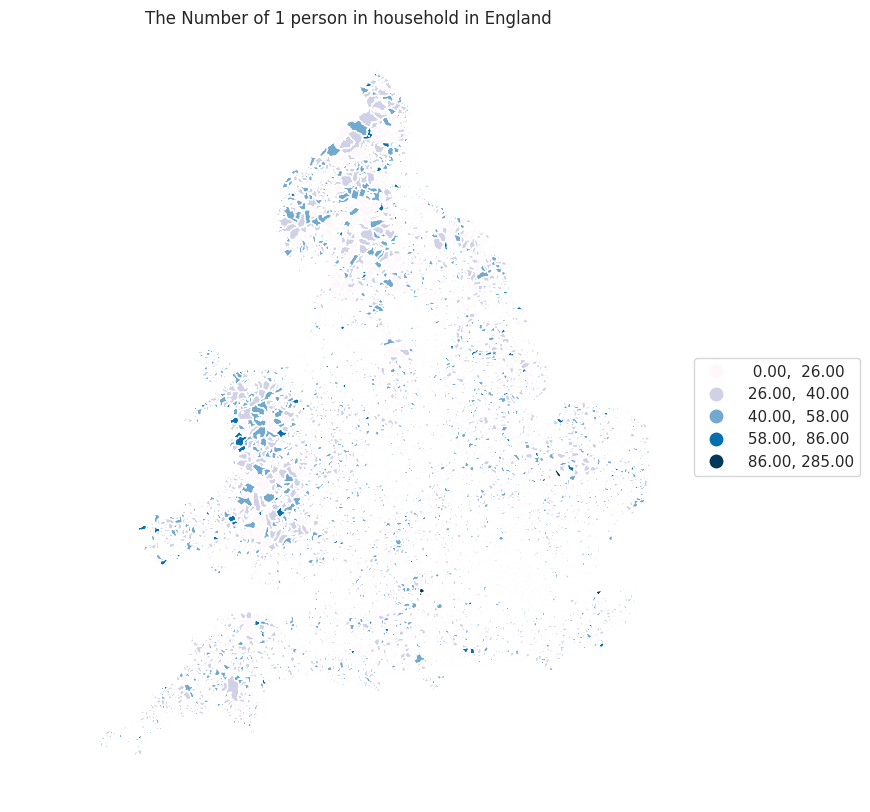

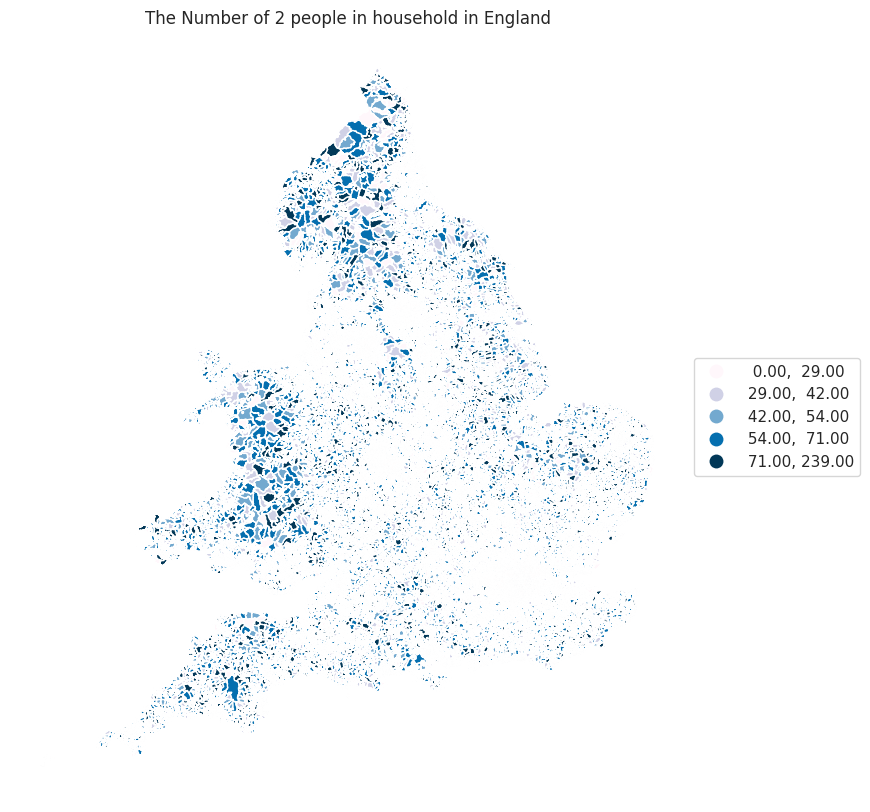

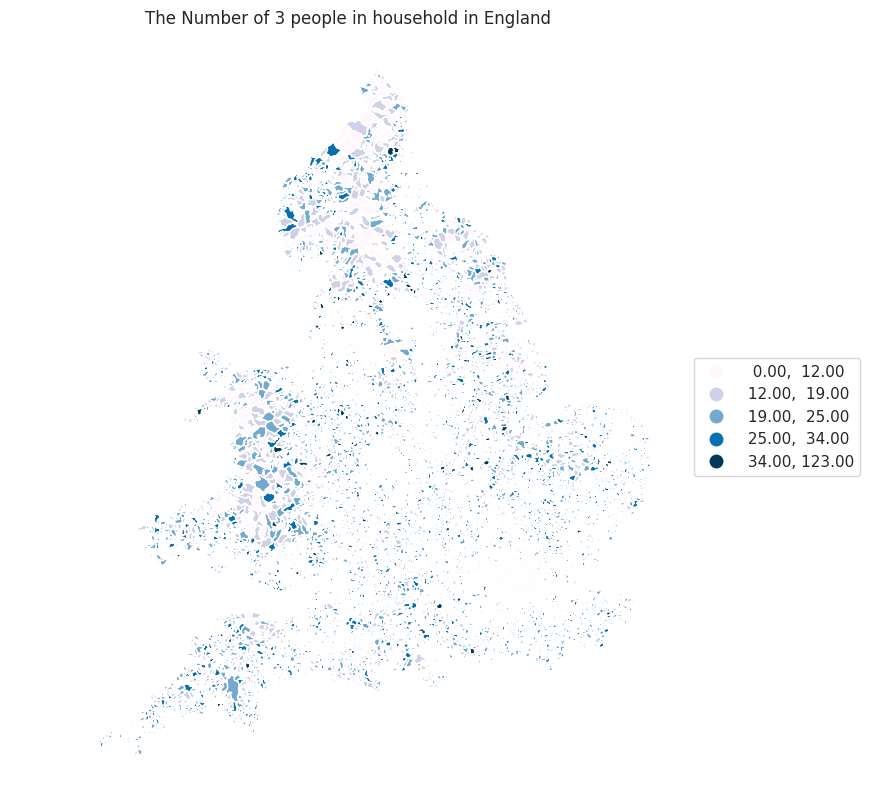

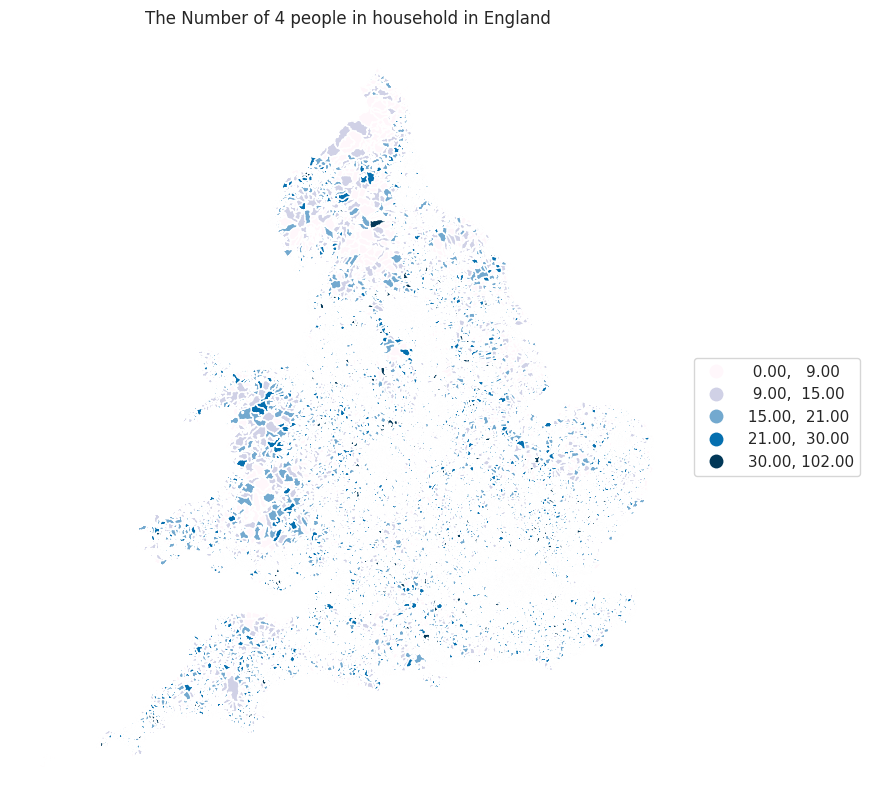

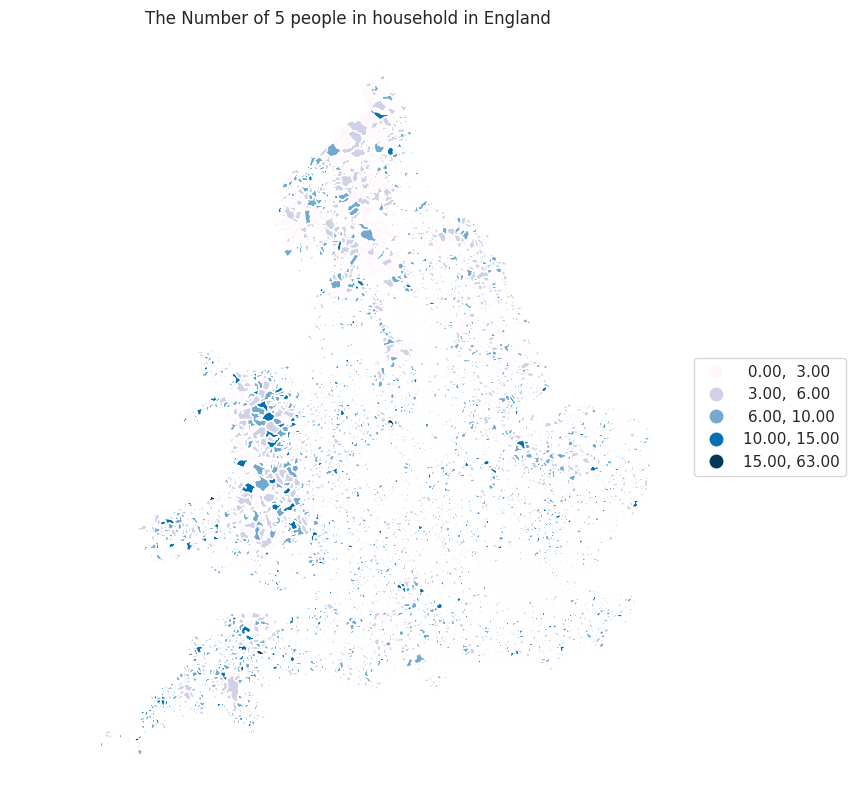

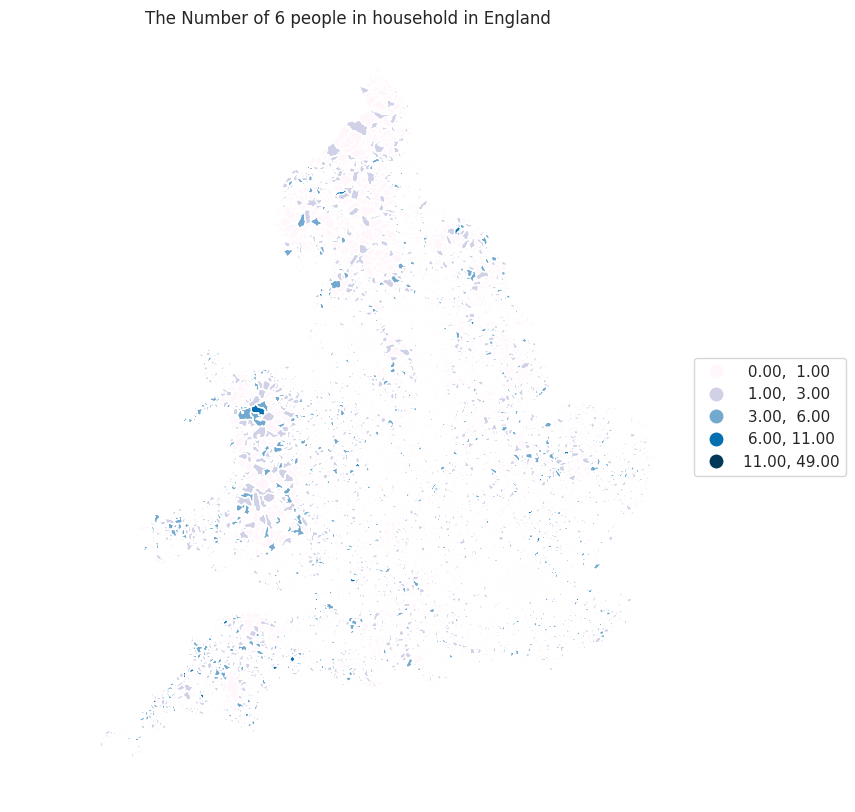

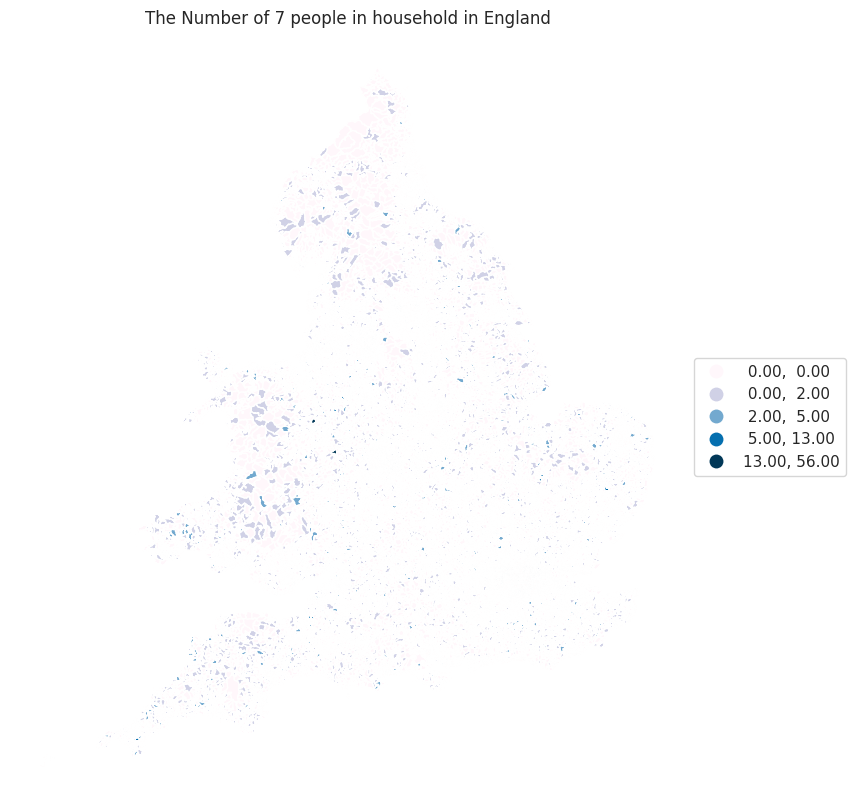

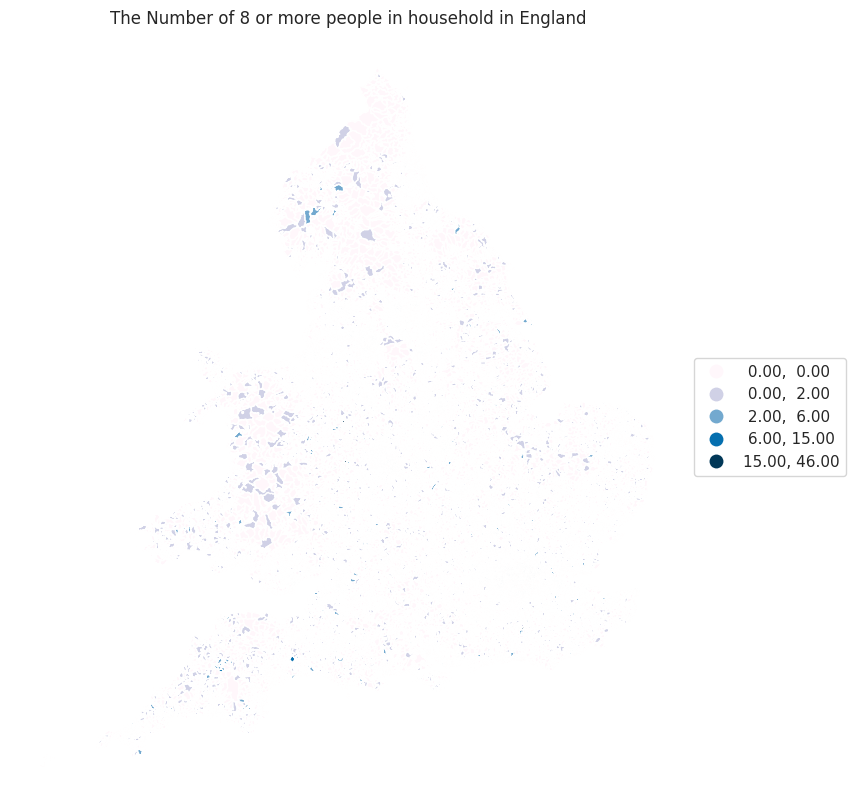

In [25]:
# create a list of the housesize columns want to plot
housesize_cols = ['1_person_in_household','2_people_in_household',
        '3_people_in_household','4_people_in_household',
        '5_people_in_household','6_people_in_household',
        '7_people_in_household','8_or_more_people_in_household']
# create a for loop for plotting a map of each domain


# for each item in a range from 0 to 8 (number of items in the housesize_cols list)
for i in range (0, len(housesize_cols)):

    # produce a plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # get the ith item in the housesize column list and plot
    england_size_car.plot(column=housesize_cols[i],


    #### format the plot ###

    # reduce linewidth between polygons
    # specify data is categorical (ordinal)
    categorical=True,
    # show the legend
    legend=True,
    # define the legend palette
    cmap='PuBu',
    # use the define axis
    ax=ax,
    # position the legend
    legend_kwds={'loc': 'center left','bbox_to_anchor':(1,0.5)},
    # classify data
    scheme='natural_breaks')

    # add a title based on the column plotted, formatting the title to look better
    plt.title('The Number of '+housesize_cols[i].replace('_',' ').capitalize()+' in England')

    # do not plot with the axis showing
    plt.axis('off')


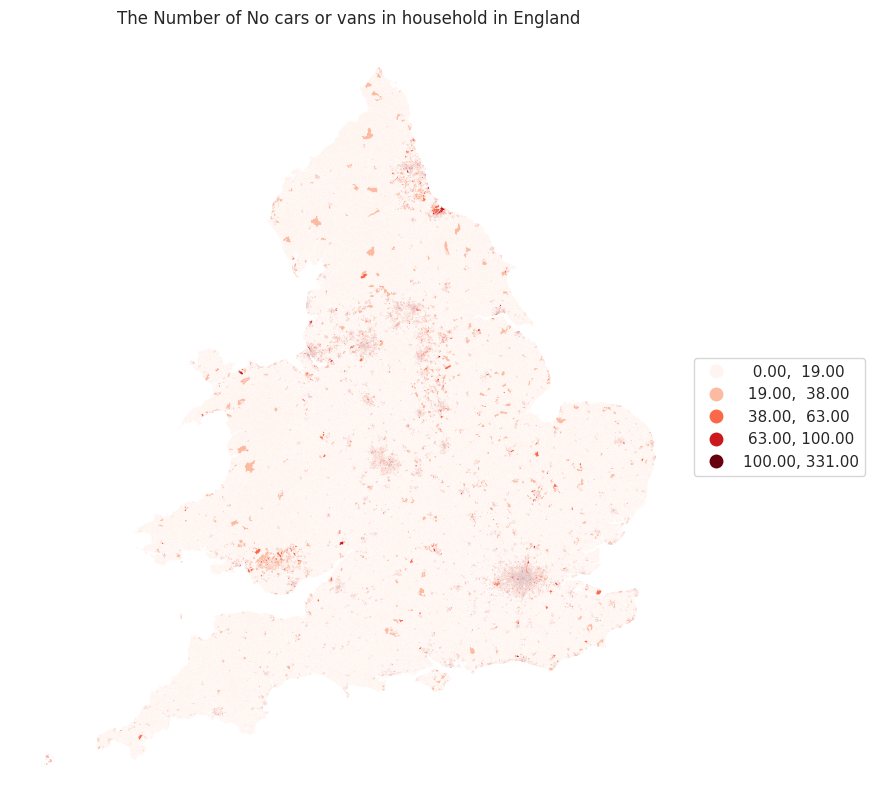

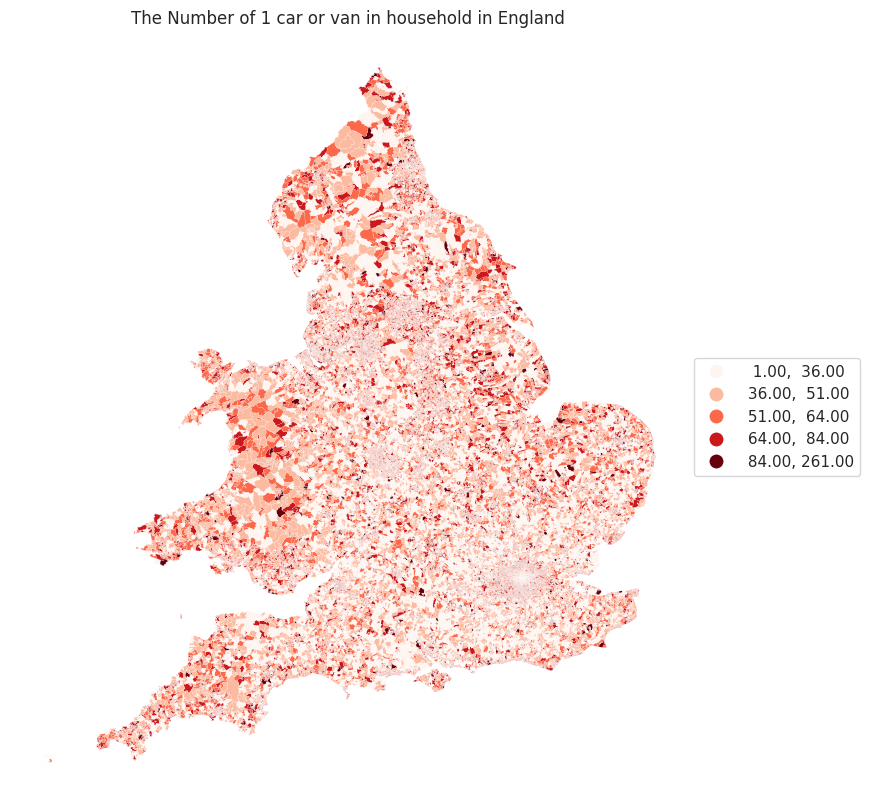

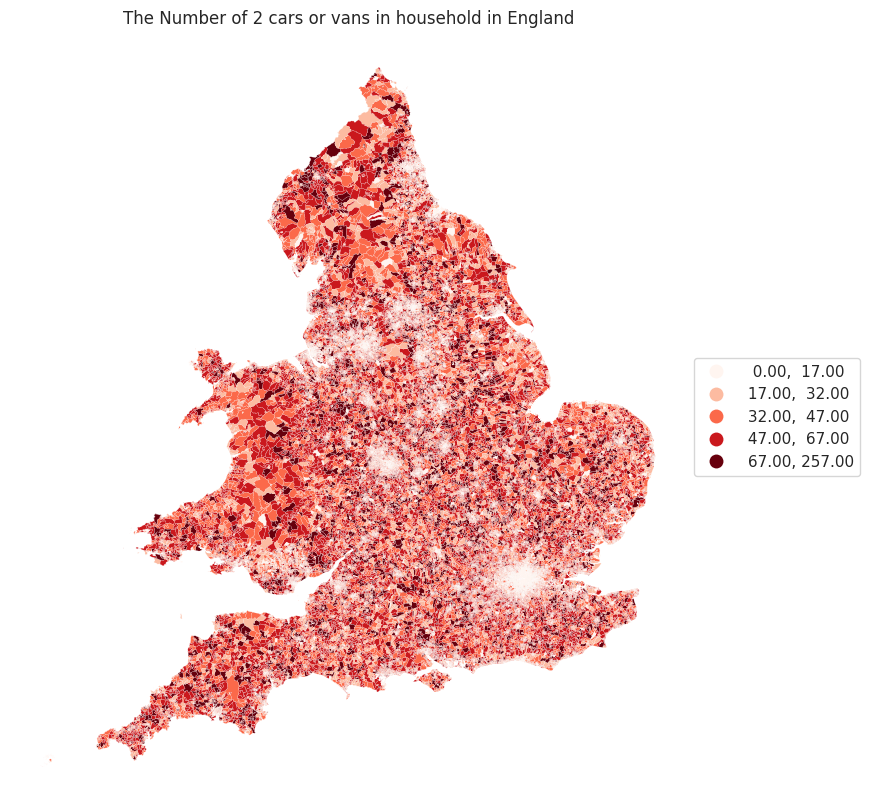

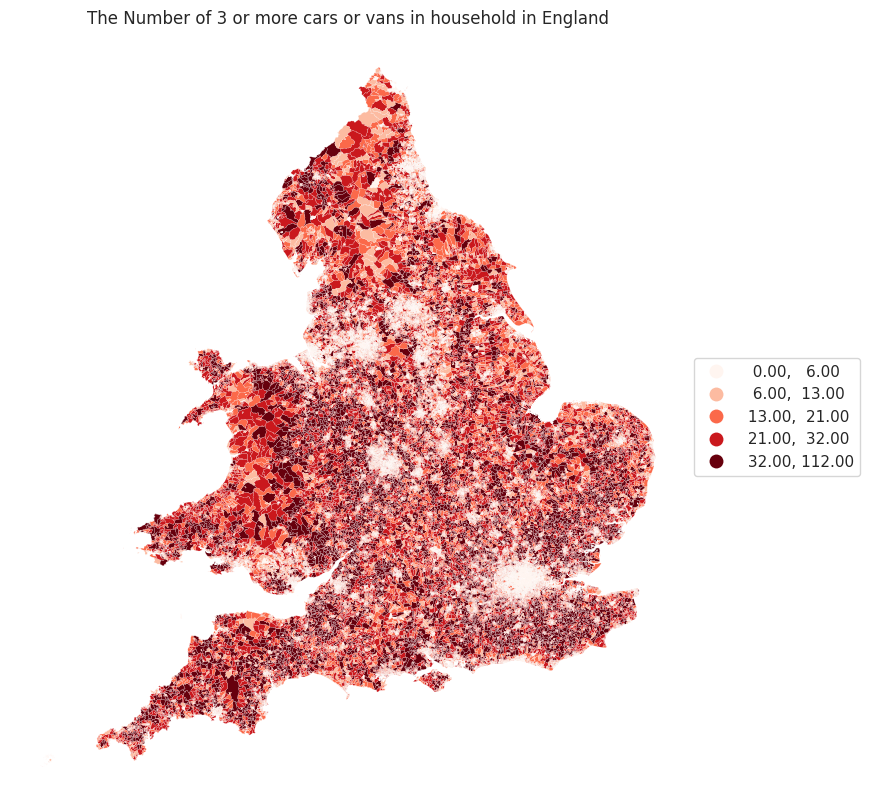

In [26]:
# create a list of the car ownership columns want to plot
housecar_cols = ['No_cars_or_vans_in_household', '1_car_or_van_in_household',
          '2_cars_or_vans_in_household', '3_or_more_cars_or_vans_in_household']
# create a for loop for plotting a map of each domain


# for each item in a range from 0 to 4 (number of items in the housecar_cols list)
for i in range (0, len(housecar_cols)):

    # produce a plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # get the ith item in the housecar_cols column list and plot
    england_size_car.plot(column=housecar_cols[i],


    #### format the plot ###

    # reduce linewidth between polygons
    linewidth =0.1,
    # specify data is categorical (ordinal)
    categorical=True,
    # show the legend
    legend=True,
    # define the legend palette
    cmap='Reds',
    # use the define axis
    ax=ax,
    # position the legend
    legend_kwds={'loc': 'center left','bbox_to_anchor':(1,0.5)},
    # classify data
    scheme='natural_breaks')

    # add a title based on the column plotted, formatting the title to look better
    plt.title('The Number of '+housecar_cols[i].replace('_',' ').capitalize()+' in England')

    # do not plot with the axis showing
    plt.axis('off')


## Data Processing for non-spatial visualisation
Firstly, joining the housesize_car in oac by left-join on common ID 'OA21CD/2021soa', and using info() to check if the join is successful. In this part the oac file is used to provide the super group classification. In the original oac.csv, the super group only shows in number. In order to make the visualisation mroe detailed, the detailed super group name is added in to file, and using the group() and sum() to check if successful. This can help to see the Data-related geographic information in non-spatial visualisation.

In [27]:
# join the householdsize_car data to the oac using a outer join, on the common ID 'OA21CD/2021soa'
housesize_car_oac = oac.merge(housesize_car, how='left', left_on='OA21CD', right_on='2021oac')
housesize_car_oac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188880 entries, 0 to 188879
Data columns (total 20 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   OA21CD                               188880 non-null  object
 1   la23cd                               188880 non-null  object
 2   sg                                   188880 non-null  int64 
 3   2021oac                              188880 non-null  object
 4   mnemonic_x                           188880 non-null  object
 5   All_households_x                     188880 non-null  int64 
 6   1_person_in_household                188880 non-null  int64 
 7   2_people_in_household                188880 non-null  int64 
 8   3_people_in_household                188880 non-null  int64 
 9   4_people_in_household                188880 non-null  int64 
 10  5_people_in_household                188880 non-null  int64 
 11  6_people_in_household     

In [28]:
# add supergroup description for sg from https://data.cdrc.ac.uk/dataset/output-area-classification-2021/resource/pen-portraits-and-input-variable-listing
housesize_car_oac.loc[housesize_car_oac['sg']==1,'super_group']='Retired Professionals'
housesize_car_oac.loc[housesize_car_oac['sg']==2,'super_group']='Suburbanites and Peri- Urbanites'
housesize_car_oac.loc[housesize_car_oac['sg']==3,'super_group']='Multicultural and Educated Urbanites'
housesize_car_oac.loc[housesize_car_oac['sg']==4,'super_group']='Low-Skilled Migrant and Student Communities '
housesize_car_oac.loc[housesize_car_oac['sg']==5,'super_group']='Ethnically Diverse Suburb- an Professionals'
housesize_car_oac.loc[housesize_car_oac['sg']==6,'super_group']='Baseline UK'
housesize_car_oac.loc[housesize_car_oac['sg']==7,'super_group']='Semi- and Un- Skilled Workforce'
housesize_car_oac.loc[housesize_car_oac['sg']==8,'super_group']='Legacy Communities'

In [29]:
# check supergroup description
housesize_car_oac.groupby('sg')['super_group'].sum()

sg
1    Retired ProfessionalsRetired ProfessionalsReti...
2    Suburbanites and Peri- UrbanitesSuburbanites a...
3    Multicultural and Educated UrbanitesMulticultu...
4    Low-Skilled Migrant and Student Communities Lo...
5    Ethnically Diverse Suburb- an ProfessionalsEth...
6    Baseline UKBaseline UKBaseline UKBaseline UKBa...
7    Semi- and Un- Skilled WorkforceSemi- and Un- S...
8    Legacy CommunitiesLegacy CommunitiesLegacy Com...
Name: super_group, dtype: object

## Non-spatial Visualisation
For this part, the PariGrid is used to create the non-spatial visualisation. PariGrid is used to subpolot grid for plotting pairwise relationship in a dataset which is very flexible. This object maps each variable in a dataset onto a column and row in a grid of multiple axes (Michael, 2012-2024). Create arrays for y_vars and x_vars and set the data as housesize_car_oac, PariGrid will get the columns, set the hue as 'super_group' which was created from last step to classify data into different types. The columns for x and y is seperate, so only need to pass a bivariate function to PairGrid.map() will draw a bivariate plot on every axes. The variable in hue will be passed to add_legend() to create a label on the right side. But there do not have parametric to set title and axie directly in PariGrid. The suptitle() is found from Matplotlib (2012-2024) to help create title for this non-spaital visualisation. The subplots_adjustcan help to leave enough space between the image and the title to ensure that the image does not cover the title.

But acctually, the data size is too large result that the dots overly on the image.

Text(0.5, 0.98, 'Exploring Household Size and Car Ownership in England')

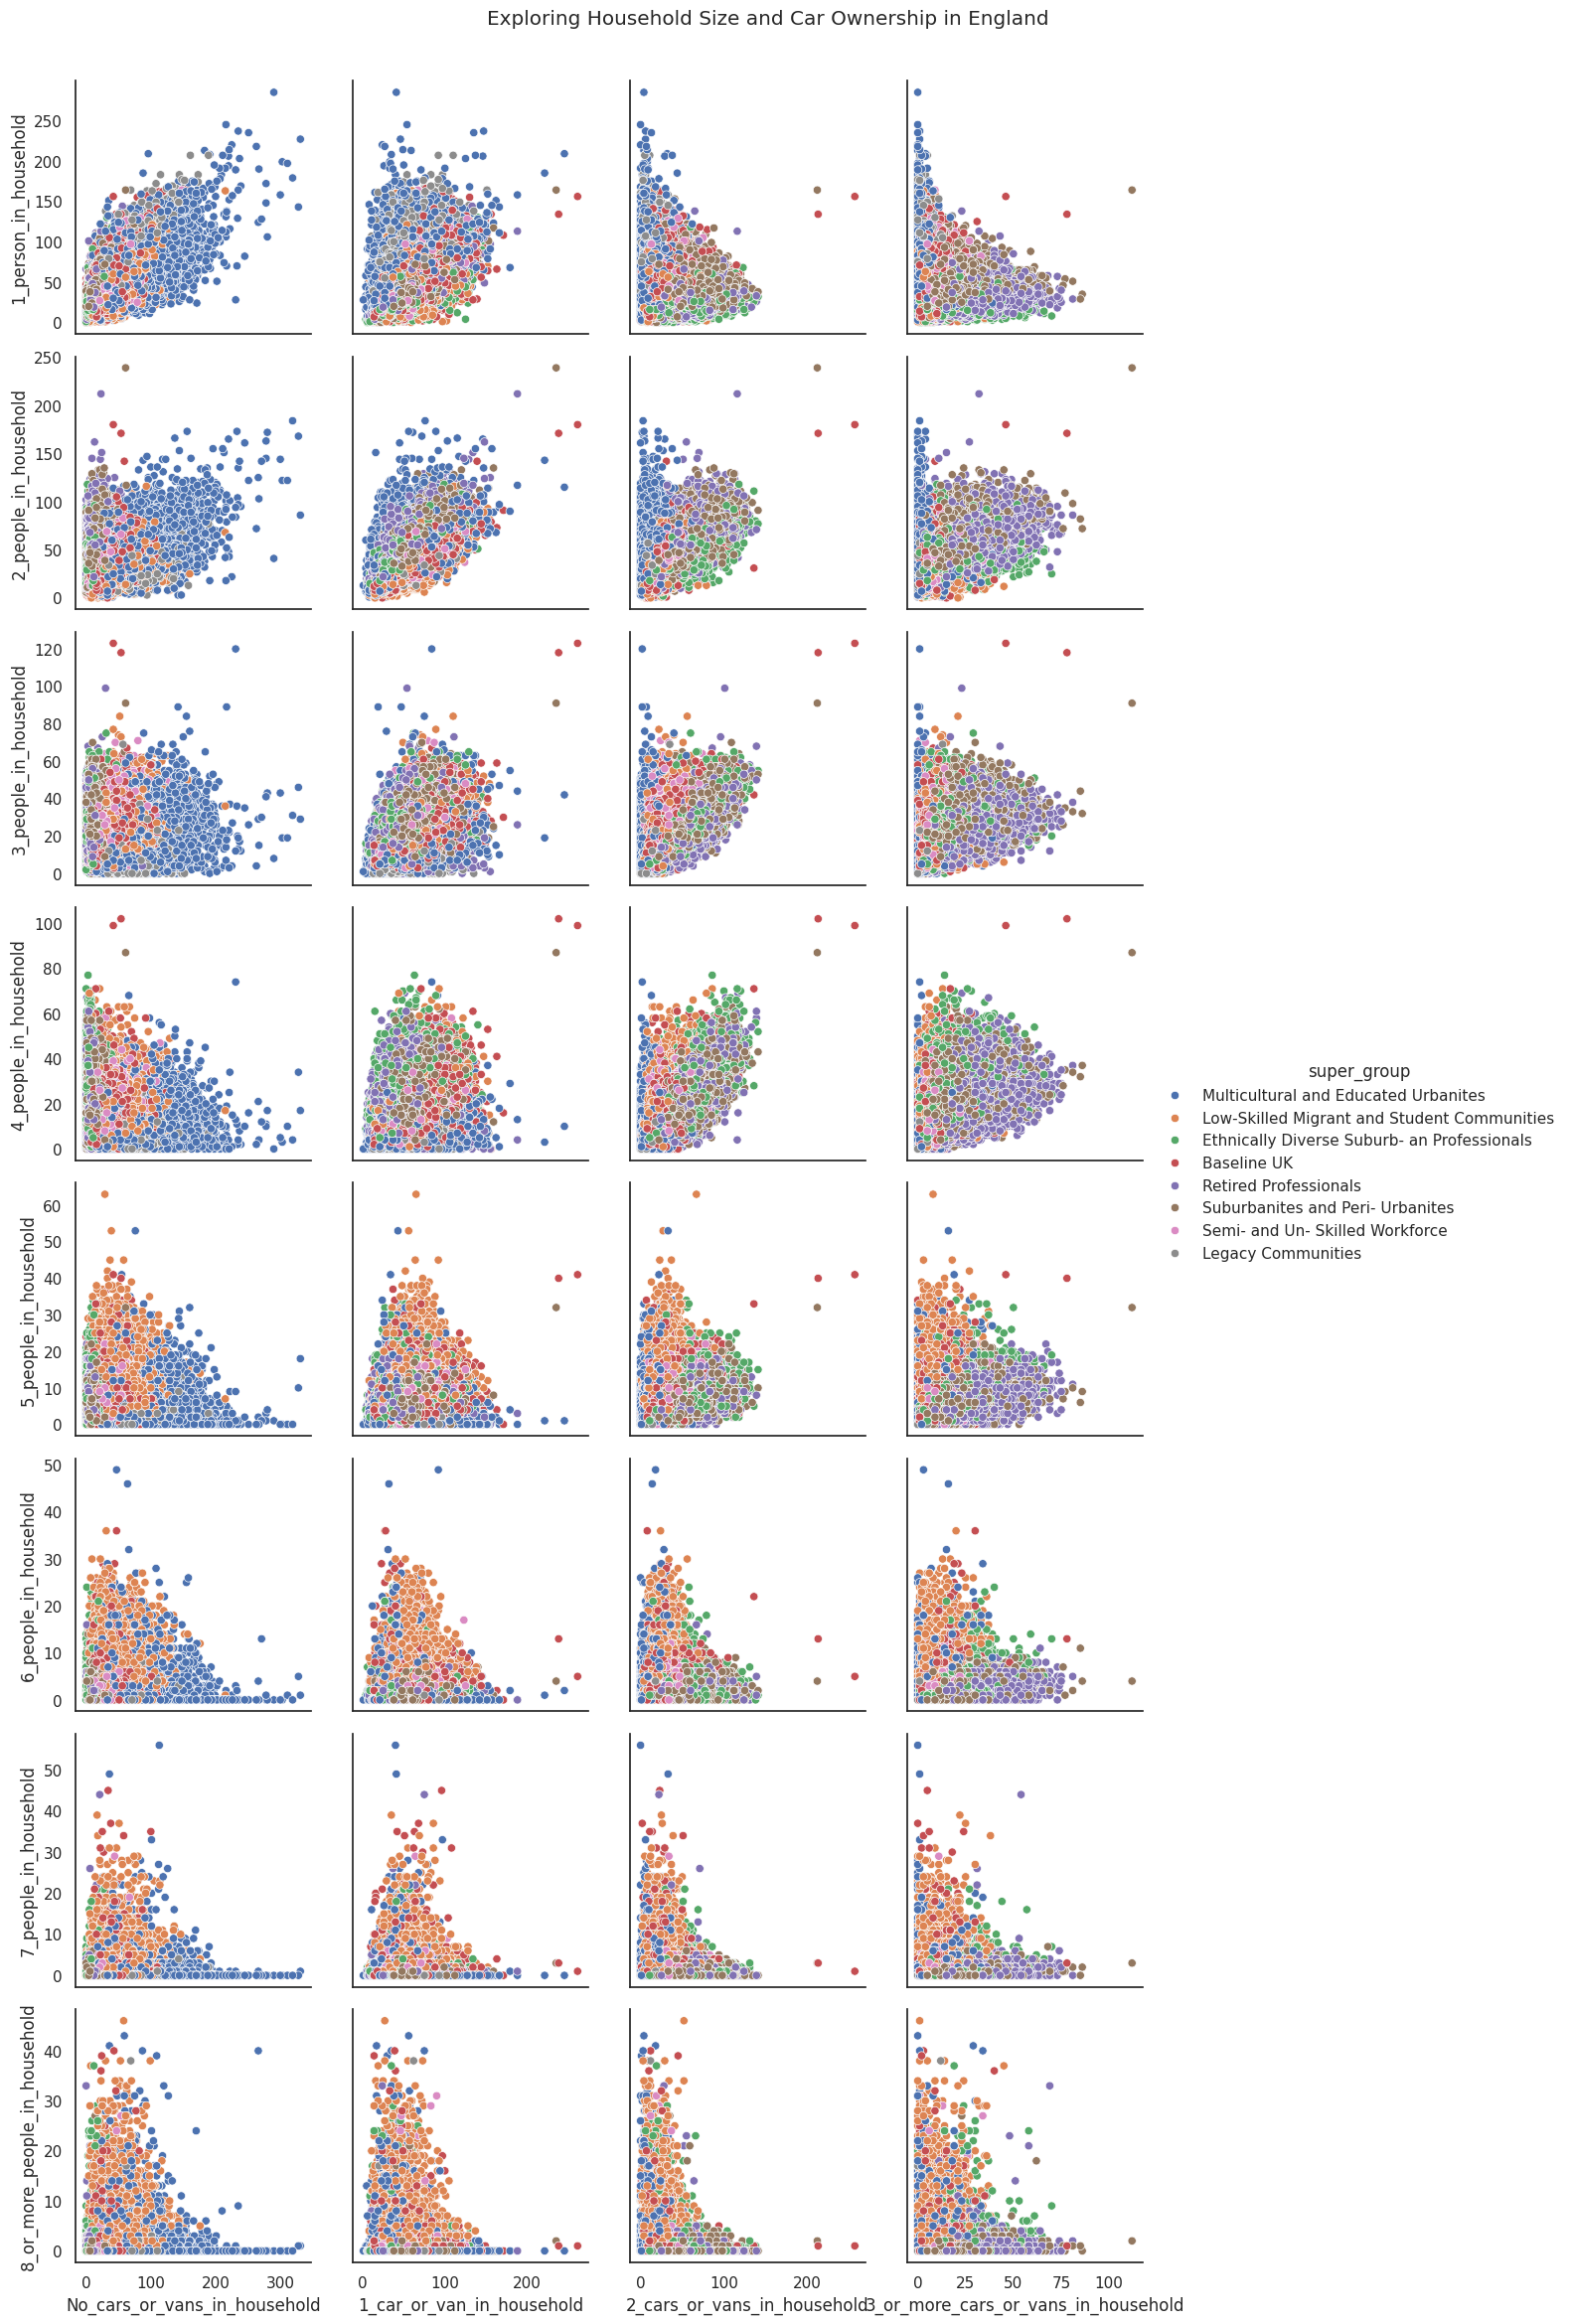

In [30]:
# create dataframe for x and y
y_vars = ['1_person_in_household', '2_people_in_household',
       '3_people_in_household', '4_people_in_household',
       '5_people_in_household', '6_people_in_household',
       '7_people_in_household','8_or_more_people_in_household']
x_vars = ['No_cars_or_vans_in_household','1_car_or_van_in_household','2_cars_or_vans_in_household','3_or_more_cars_or_vans_in_household']
g = sns.PairGrid(data=housesize_car_oac, x_vars=x_vars, y_vars=y_vars, hue='super_group', height=3)
# draw a bivariate plot on every exea
g.map(sns.scatterplot)
# make a legend that explains hue
g.add_legend()
# adjust location of title
plt.subplots_adjust(top=0.95)
# add title
g.fig.suptitle('Exploring Household Size and Car Ownership in England')


## Spearman's rank
Based on the PariGrid image, I determine that there is a non-linear relationship between the househlod size and car availability, so the Spearman's rank coorelation is uesed to search the relationship between the two data. Creatign a variant to get the calculation of spearman's rank, then create a heatmap to visualiza the spearman's rank. Creating 'x_axis_labels' and 'y_axis_labels' to get columns from 'size_car_domains_corr' with removing '_' from name, the element.capitalize() helps to make element' name into capitalize. Here also using print to show elements in this part above image.

For the heatmap, a mask is used to cover the upper right hand corner of the plot. Vmin and vmax are used to define the value of cbar. Cbar_kws is uesed to add a label and name for image. FInally, set() helps to add label for x and y, mian title also is added in visualisation.

In [31]:
# Calculate Spearman's rank correlation
size_car_domains_corr =housesize_car[['No_cars_or_vans_in_household', '1_car_or_van_in_household',
       '2_cars_or_vans_in_household', '3_or_more_cars_or_vans_in_household',
       '1_person_in_household', '2_people_in_household',
       '3_people_in_household', '4_people_in_household',
       '5_people_in_household', '6_people_in_household',
       '7_people_in_household','8_or_more_people_in_household']].corr(method = 'spearman')
size_car_domains_corr

No_cars_or_vans_in_household  \
No_cars_or_vans_in_household                             1.000000   
1_car_or_van_in_household                                0.216588   
2_cars_or_vans_in_household                             -0.741399   
3_or_more_cars_or_vans_in_household                     -0.732591   
1_person_in_household                                    0.590281   
2_people_in_household                                   -0.244085   
3_people_in_household                                   -0.035742   
4_people_in_household                                   -0.244057   
5_people_in_household                                    0.018653   
6_people_in_household                                    0.139657   
7_people_in_household                                    0.160065   
8_or_more_people_in_household                            0.174910   

                                     1_car_or_van_in_household  \
No_cars_or_vans_in_household                          0.216588   
1_car_or_van_in_household                             1.000000   
2_cars_or_vans_in_household                           0.073037   
3_or_more_cars_or_vans_in_household                  -0.083257   
1_person_in_household                                 0.464606   
2_people_in_household                                 0.387876   
3_people_in_household                                 0.313238   
4_people_in_household                                 0.161324   
5_people_in_household                                 0.071657   
6_people_in_household                                 0.031953   
7_people_in_household                                 0.010642   
8_or_more_people_in_household                        -0.001965   

                                     2_cars_or_vans_in_household  \
No_cars_or_vans_in_household                           -0.741399   
1_car_or_van_in_household                               0.073037   
2_cars_or_vans_in_household                             1.000000   
3_or_more_cars_or_vans_in_household                     0.799634   
1_person_in_household                                  -0.283177   
2_people_in_household                                   0.551924   
3_people_in_household                                   0.346779   
4_people_in_household                                   0.488542   
5_people_in_household                                   0.159376   
6_people_in_household                                  -0.026464   
7_people_in_household                                  -0.092343   
8_or_more_people_in_household                          -0.129287   

                                     3_or_more_cars_or_vans_in_household  \
No_cars_or_vans_in_household                                   -0.732591   
1_car_or_van_in_household                                      -0.083257   
2_cars_or_vans_in_household                                     0.799634   
3_or_more_cars_or_vans_in_household                             1.000000   
1_person_in_household                                          -0.331021   
2_people_in_household                                           0.421370   
3_people_in_household                                           0.221419   
4_people_in_household                                           0.389723   
5_people_in_household                                           0.165137   
6_people_in_household                                           0.022105   
7_people_in_household                                          -0.037492   
8_or_more_people_in_household                                  -0.063390   

                                     1_person_in_household  \
No_cars_or_vans_in_household                      0.590281   
1_car_or_van_in_household                         0.464606   
2_cars_or_vans_in_household                      -0.283177   
3_or_more_cars_or_vans_in_household              -0.331021   
1_person_in_household                             1.000000   
2_people_in_household             

Labels with capital letters: ['No cars or vans in household', '1 car or van in household', '2 cars or vans in household', '3 or more cars or vans in household', '1 person in household', '2 people in household', '3 people in household', '4 people in household', '5 people in household', '6 people in household', '7 people in household', '8 or more people in household'] ['No cars or vans in household', '1 car or van in household', '2 cars or vans in household', '3 or more cars or vans in household', '1 person in household', '2 people in household', '3 people in household', '4 people in household', '5 people in household', '6 people in household', '7 people in household', '8 or more people in household']


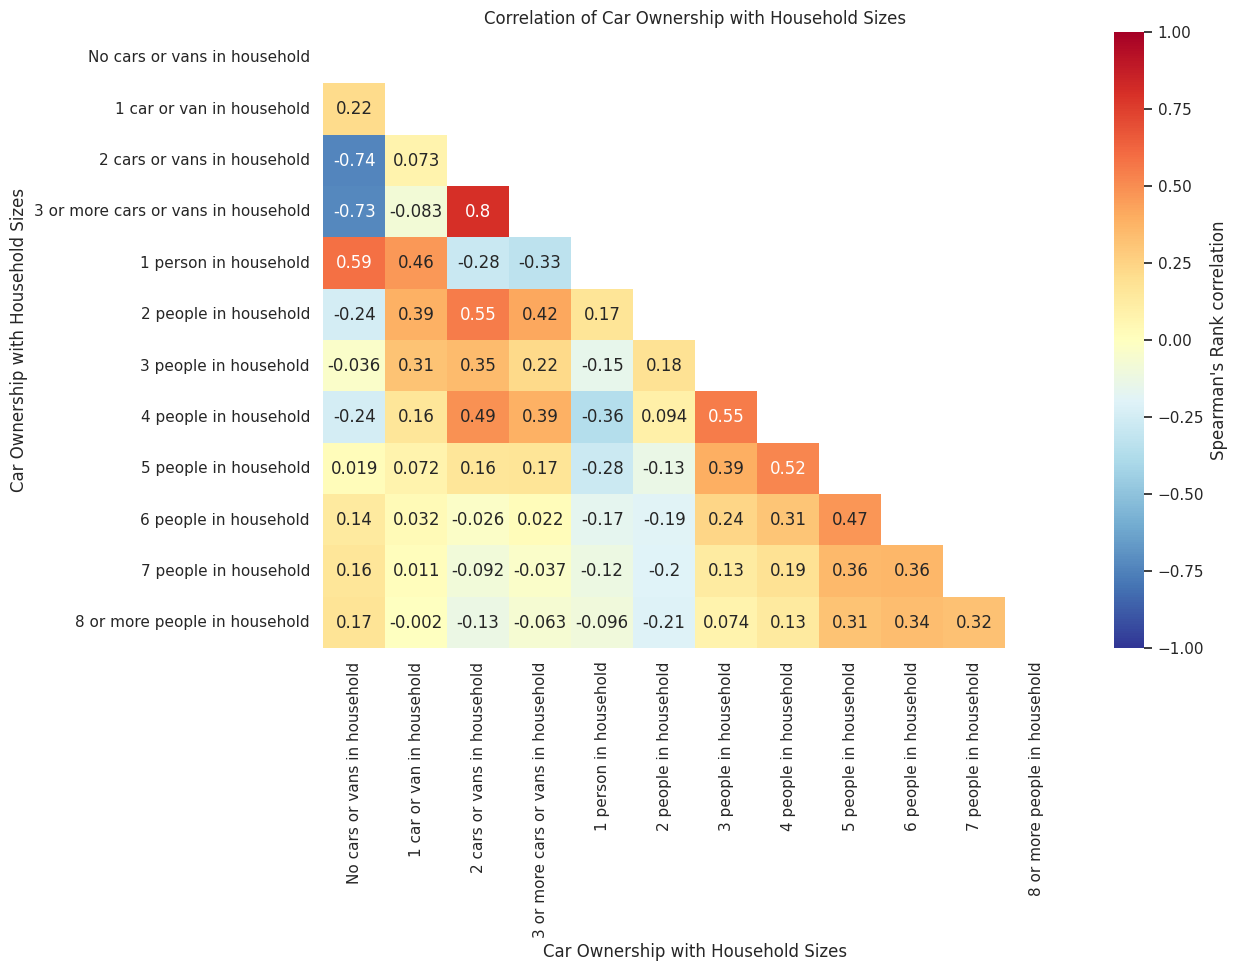

In [32]:
# define plot size
fig,ax = plt.subplots(figsize=(12,8))

# define mask to apply to upper right hand corner of the plot
data_to_mask = np.triu(np.ones_like(size_car_domains_corr))

# define axis tick labels
# get the index and the columns, replace the underscores with spaces
x_axis_labels = size_car_domains_corr.columns.str.replace('_',' ')
y_axis_labels = size_car_domains_corr.index.str.replace('_',' ')

# capitalize each tick label for each element in the list of x_axis_labels, capitalize it
x_axis_labels = [element.capitalize() for element in x_axis_labels]
y_axis_labels = [element.capitalize() for element in y_axis_labels]

# look at the new labels
print('Labels with capital letters:',x_axis_labels ,y_axis_labels)


# plot a heatmap of the correlation dataframe
sns.heatmap(size_car_domains_corr,
            # annotate so spearman's rank correlation values are displayed on the squares
            annot=True,
            # define colourmap
            cmap='RdYlBu_r',
            # define value of minimum colour on cbar
            vmin=-1,
            # define value of maximum colour on cbar
            vmax=1,
            # add the mask
            mask=data_to_mask,
            # use the custom tick labels
            xticklabels=x_axis_labels,
            yticklabels=y_axis_labels,
            # add a label to the cbar
            cbar_kws={'label': "Spearman's Rank correlation"},
            # plot on the axis we defined
            ax=ax)

# Set axis labels
ax.set(xlabel="Car Ownership with Household Sizes",
       ylabel="Car Ownership with Household Sizes",
      title ='Correlation of Car Ownership with Household Sizes' );

## Reference
Dasari, D. and Varma, P.S. Employing Various Data Cleaning Techniques to Achieve Better Data Quality using Python. In: 2022: IEEE, pp.1379-1383.


Matplotlib.2012-2024.Constrained layout guide.[Online]. [Accessed 13 May 2024]. Available from:https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html#suptitle

Michael Waskom. 2012-2024.seaborn.PairGrid.[Online]. [Accessed 12 May 2024]. Available from:https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid
